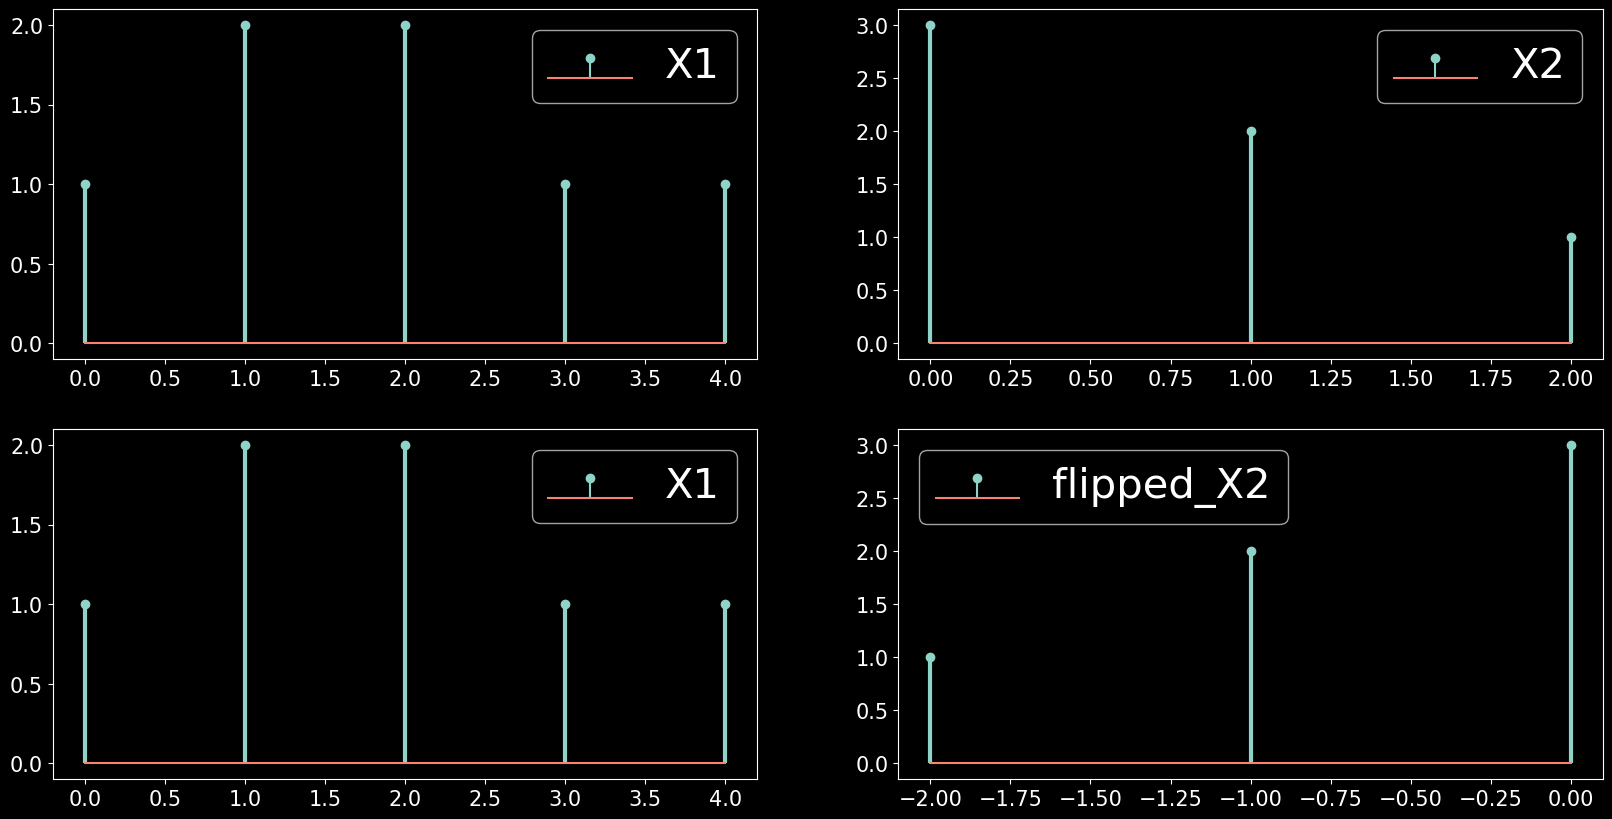

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import style
#generating and Plotting X1 
x1=np.array([1,2,2,1,1])
n1=np.array([0,1,2,3,4])
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.subplot(2,2,1)
markerline,stemlines,baseline=plt.stem(n1,x1,label='X1')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
 #generation and plotting X2
x2=np.array([3,2,1])
n2=np.array([0,1,2])
plt.subplot(2,2,2)
markerline,stemlines,baseline=plt.stem(n2,x2,label='X2')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
#Plotting X1 at position 3
plt.subplot(2,2,3)
markerline,stemlines,baseline=plt.stem(n1,x1,label='X1')
plt.legend(fontsize=30)
plt.setp(stemlines,'linewidth',3)
#flipping X2 at postion 4
f_x2=x2[::-1]
n3=np.array([-2,-1,0])
plt.subplot(2,2,4)
markerline,stemlines,baseline =plt.stem(n3,f_x2,label='flipped_X2')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)

plt.show()

In [25]:
nx1=len(x1)
nx2=len(x2)
nconv=nx1+nx2-1
print(nx1)
print(nx2)
print(nconv)

5
3
7


In [26]:
import numpy as np
half_nx2=int(np.round(nx2/2))
data_4_conv = np.concatenate((np.zeros(half_nx2),x1,np.zeros(half_nx2)),axis=0)
print(half_nx2)
print(np.zeros(half_nx2))
print((data_4_conv))





2
[0. 0.]
[0. 0. 1. 2. 2. 1. 1. 0. 0.]


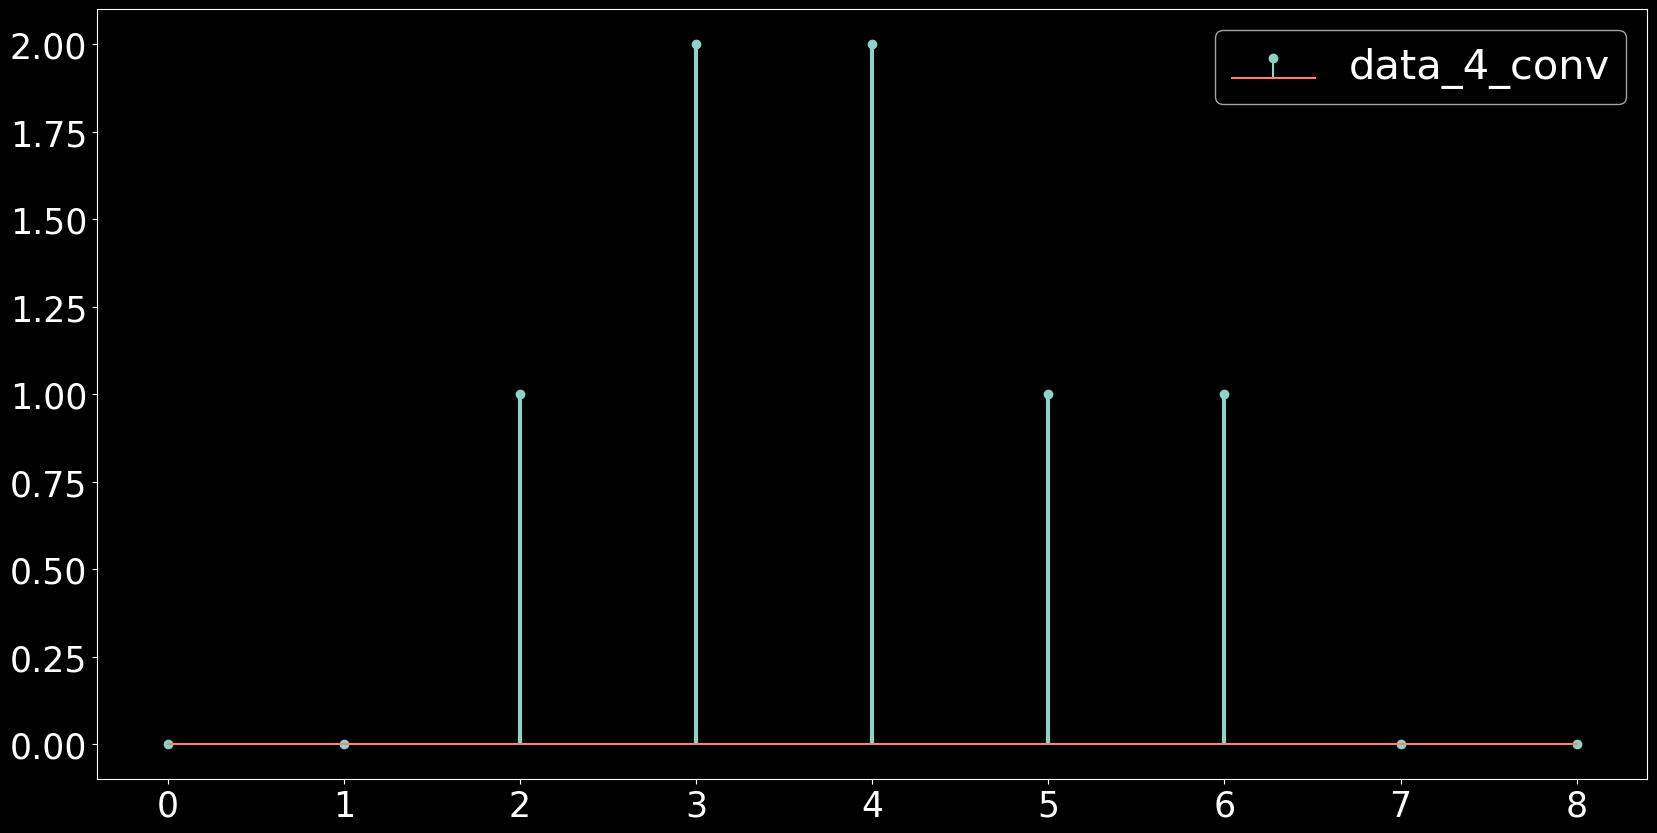

In [27]:
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
markersize,stemlines,baseline=plt.stem(data_4_conv,label='data_4_conv')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
plt.show()